In [1]:
# Imports and setup
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans, DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
import warnings
warnings.filterwarnings('ignore')

# Set style for better plots
plt.style.use('default')
sns.set_palette("husl")

In [4]:
# Load dataset
df = pd.read_csv('Mall_Customers.csv')
print(f"Dataset shape: {df.shape}")
print(f"Columns: {df.columns.tolist()}")
df.head()


Dataset shape: (200, 5)
Columns: ['CustomerID', 'Gender', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)']


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [8]:
# Data preprocessing and feature selection
income_cols = ["Annual Income (k$)", "Income", "AnnualIncome"]
spending_cols = ["Spending Score (1-100)", "SpendingScore", "Score"]

income_col = next((col for col in income_cols if col in df.columns), None)
spending_col = next((col for col in spending_cols if col in df.columns), None)

if income_col is None or spending_col is None:
    raise ValueError("Not Found")

print(f"Using columns: {income_col}, {spending_col}")

x = df[[income_col, spending_col]].copy()

scaler = StandardScaler()
x_scaler = scaler.fit_transform(x)
print("Features scaled using StandardScaler")

Using columns: Annual Income (k$), Spending Score (1-100)
Features scaled using StandardScaler


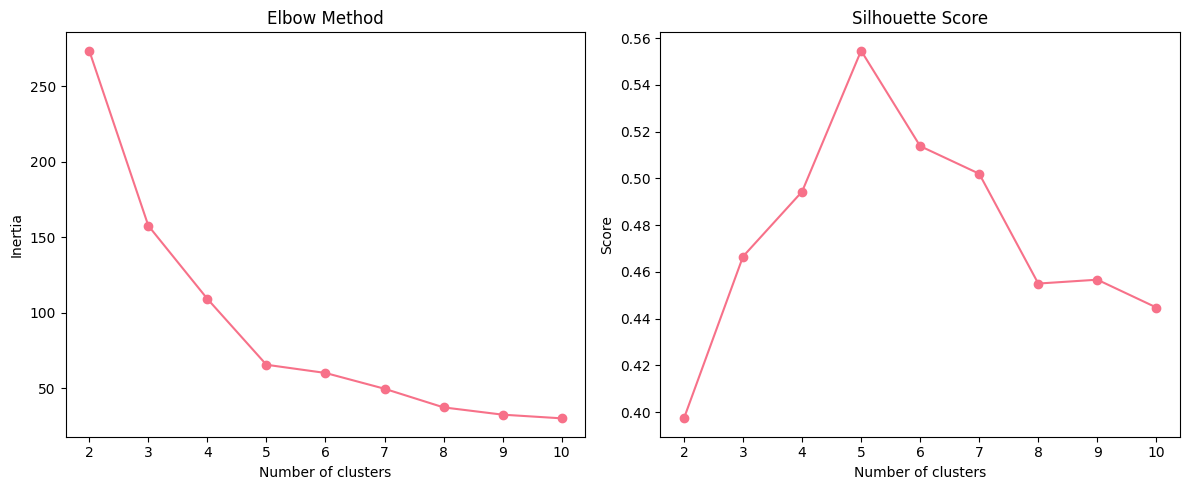

In [10]:
inertia = []
silhouette_scores = []
K = range(2, 11)

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(x_scaler)
    inertia.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(x_scaler, kmeans.labels_))

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(K, inertia, marker="o")
plt.title("Elbow Method")
plt.xlabel("Number of clusters")
plt.ylabel("Inertia")

plt.subplot(1, 2, 2)
plt.plot(K, silhouette_scores, marker="o")
plt.title("Silhouette Score")
plt.xlabel("Number of clusters")
plt.ylabel("Score")

plt.tight_layout()
plt.show()

Optimal K (clusters) = 5


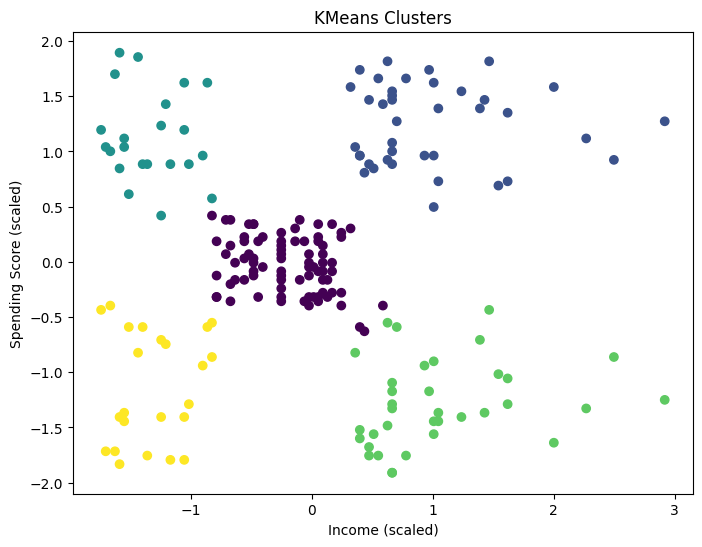

In [12]:
# K-Mean Clustering

optimal_k = silhouette_scores.index(max(silhouette_scores)) + 2
print(f"Optimal K (clusters) = {optimal_k}")

kmeans = KMeans(n_clusters=optimal_k, random_state=42)
df["KMeans_Cluster"] = kmeans.fit_predict(x_scaler)

# Visualization
plt.figure(figsize=(8, 6))
plt.scatter(x_scaler[:, 0], x_scaler[:, 1], c=df["KMeans_Cluster"], cmap="viridis")
plt.title("KMeans Clusters")
plt.xlabel("Income (scaled)")
plt.ylabel("Spending Score (scaled)")
plt.show()

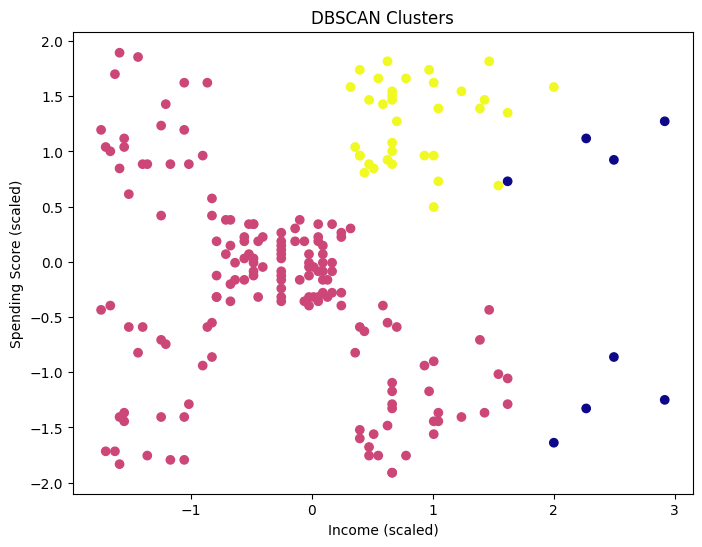

In [13]:
# DBSCAN Clustering
dbscan = DBSCAN(eps=0.5, min_samples=5)
df["DBSCAN_Cluster"] = dbscan.fit_predict(x_scaler)

plt.figure(figsize=(8, 6))
plt.scatter(x_scaler[:, 0], x_scaler[:, 1], c=df["DBSCAN_Cluster"], cmap="plasma")
plt.title("DBSCAN Clusters")
plt.xlabel("Income (scaled)")
plt.ylabel("Spending Score (scaled)")
plt.show()

In [14]:
# Calculate average income and spending score for each cluster
cluster_summary = df.groupby("KMeans_Cluster")[[income_col, spending_col]].mean()
print("\nCluster Summary (Averages):")
print(cluster_summary)

# Save clustered data and summary to CSV files
df.to_csv("clustered_customers.csv", index=False)
cluster_summary.to_csv("cluster_summary.csv")



Cluster Summary (Averages):
                Annual Income (k$)  Spending Score (1-100)
KMeans_Cluster                                            
0                        55.296296               49.518519
1                        86.538462               82.128205
2                        25.727273               79.363636
3                        88.200000               17.114286
4                        26.304348               20.913043
